## Architecture of ANN

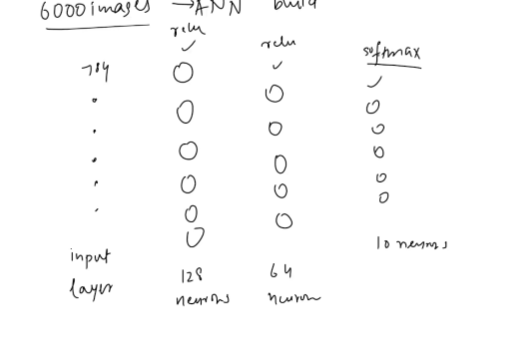

In [1]:
## Workflow
 #-----DataLoader Objects
 #-----Training loop 
 #-----Evaluation

In [2]:
import torch as tp 
from torch.utils.data import DataLoader,Dataset
import pandas as pd 
import torch.nn as nn 
import torch.optim as optim
from sklearn.model_selection import train_test_split as tts 
import matplotlib.pyplot as plt 


In [3]:
# Random seed for reproducibility
tp.manual_seed(42)

# Reading the dataset
data=pd.read_csv('fmnist_small.csv')

X=data.iloc[:,1:].values
y=data.iloc[:,0].values

# Spliting the data to train test
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

## Scailing the images for better use
X_train=X_train/255.0
X_test=X_test/255.0


In [4]:
# Custom Dataset Class

class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features=tp.tensor(features,dtype=tp.float32)
        self.labels=tp.tensor(labels,dtype=tp.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, index):
        return self.features[index],self.labels[index]
    

## Train dataset and test dataset
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [5]:
# Create train and test loader
train_loader=DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=16,shuffle=False)

In [6]:
# Defining a NN Class
class MyNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    # Forward pass
    def forward(self,x):
        return self.model(x)
    

In [7]:
# Set Learning rate and epoch
epochs=200
l_rate=0.1

# Instatiate the model 
model=MyNN(X_train.shape[1])

# loss function
criterion=nn.CrossEntropyLoss()

# Optimizer
optimizer=optim.SGD(model.parameters(),lr=l_rate)

In [8]:
# Training loop 
for epoch in range(epochs):
    total_epoch_loss=0
    for batch_features,batch_labels in train_loader:
        # Forward pass
        out=model(batch_features)
        # Calc loss
        loss=criterion(out,batch_labels)

        optimizer.zero_grad()
        # Back pass
        loss.backward()
        # Update grad
        optimizer.step()

        total_epoch_loss=total_epoch_loss+loss.item()
    avg_loss=total_epoch_loss/len(train_loader)
    print(f'Epoch: {epoch+1}, Loss: {avg_loss}')

Epoch: 1, Loss: 1.1228866445024808
Epoch: 2, Loss: 0.6941860937575499
Epoch: 3, Loss: 0.576086344718933
Epoch: 4, Loss: 0.5185955432305733
Epoch: 5, Loss: 0.4801632043222586
Epoch: 6, Loss: 0.4378896590322256
Epoch: 7, Loss: 0.420162018549939
Epoch: 8, Loss: 0.3979154706125458
Epoch: 9, Loss: 0.37395812102903925
Epoch: 10, Loss: 0.354520630047967
Epoch: 11, Loss: 0.3338989236205816
Epoch: 12, Loss: 0.3267182985755305
Epoch: 13, Loss: 0.3007908181349436
Epoch: 14, Loss: 0.3013260361397018
Epoch: 15, Loss: 0.2878292483898501
Epoch: 16, Loss: 0.2687365199470272
Epoch: 17, Loss: 0.2503560394855837
Epoch: 18, Loss: 0.254842613954097
Epoch: 19, Loss: 0.23589861263210574
Epoch: 20, Loss: 0.22643159318094452
Epoch: 21, Loss: 0.22256652837929627
Epoch: 22, Loss: 0.20911399251470963
Epoch: 23, Loss: 0.20067640502937137
Epoch: 24, Loss: 0.19116917376251272
Epoch: 25, Loss: 0.19281860599915188
Epoch: 26, Loss: 0.19280445568729193
Epoch: 27, Loss: 0.18195852491383752
Epoch: 28, Loss: 0.170157353243

In [9]:
# Set Model to Eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [10]:
# Set model to evaluation mode

total = 0
correct = 0

with tp.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)

        _, predicted = tp.max(outputs, 1)

        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 84.42%
